# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

**1- Extraction des données quantitatives et synthèse**

In [4]:
data_num = data.iloc[:,1:7]
data_num

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0    12669   9656     7561     214              2674        1338
1     7057   9810     9568    1762              3293        1776
2     6353   8808     7684    2405              3516        7844
3    13265   1196     4221    6404               507        1788
4    22615   5410     7198    3915              1777        5185
..     ...    ...      ...     ...               ...         ...
435  29703  12051    16027   13135               182        2204
436  39228   1431      764    4510                93        2346
437  14531  15488    30243     437             14841        1867
438  10290   1981     2232    1038               168        2125
439   2787   1698     2510      65               477          52

[440 rows x 6 columns]

On peut voir les variables quantitatives et les 440 individus

In [5]:
x = data_num.values
x

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

**2- Analyse ACP**

In [6]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [7]:
# Normalisation des données (données centrées et réduites)
data_cr = StandardScaler().fit_transform(x)
data_cr

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [8]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

In [9]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(data_cr)

In [14]:
# valeurs propres
eigval = variance*(len(data_cr)-1)/len(data_cr) #ajustement suite à la version 0.2
print(eigval)

[2.64497357 1.70258397]


In [16]:
# Ratio de variance expliquée sur les deux composantes
print(pca.explained_variance_ratio_)

[0.44082893 0.283764  ]


Environ plus de 70 % de l'information est préservée

**Graphique des individus**

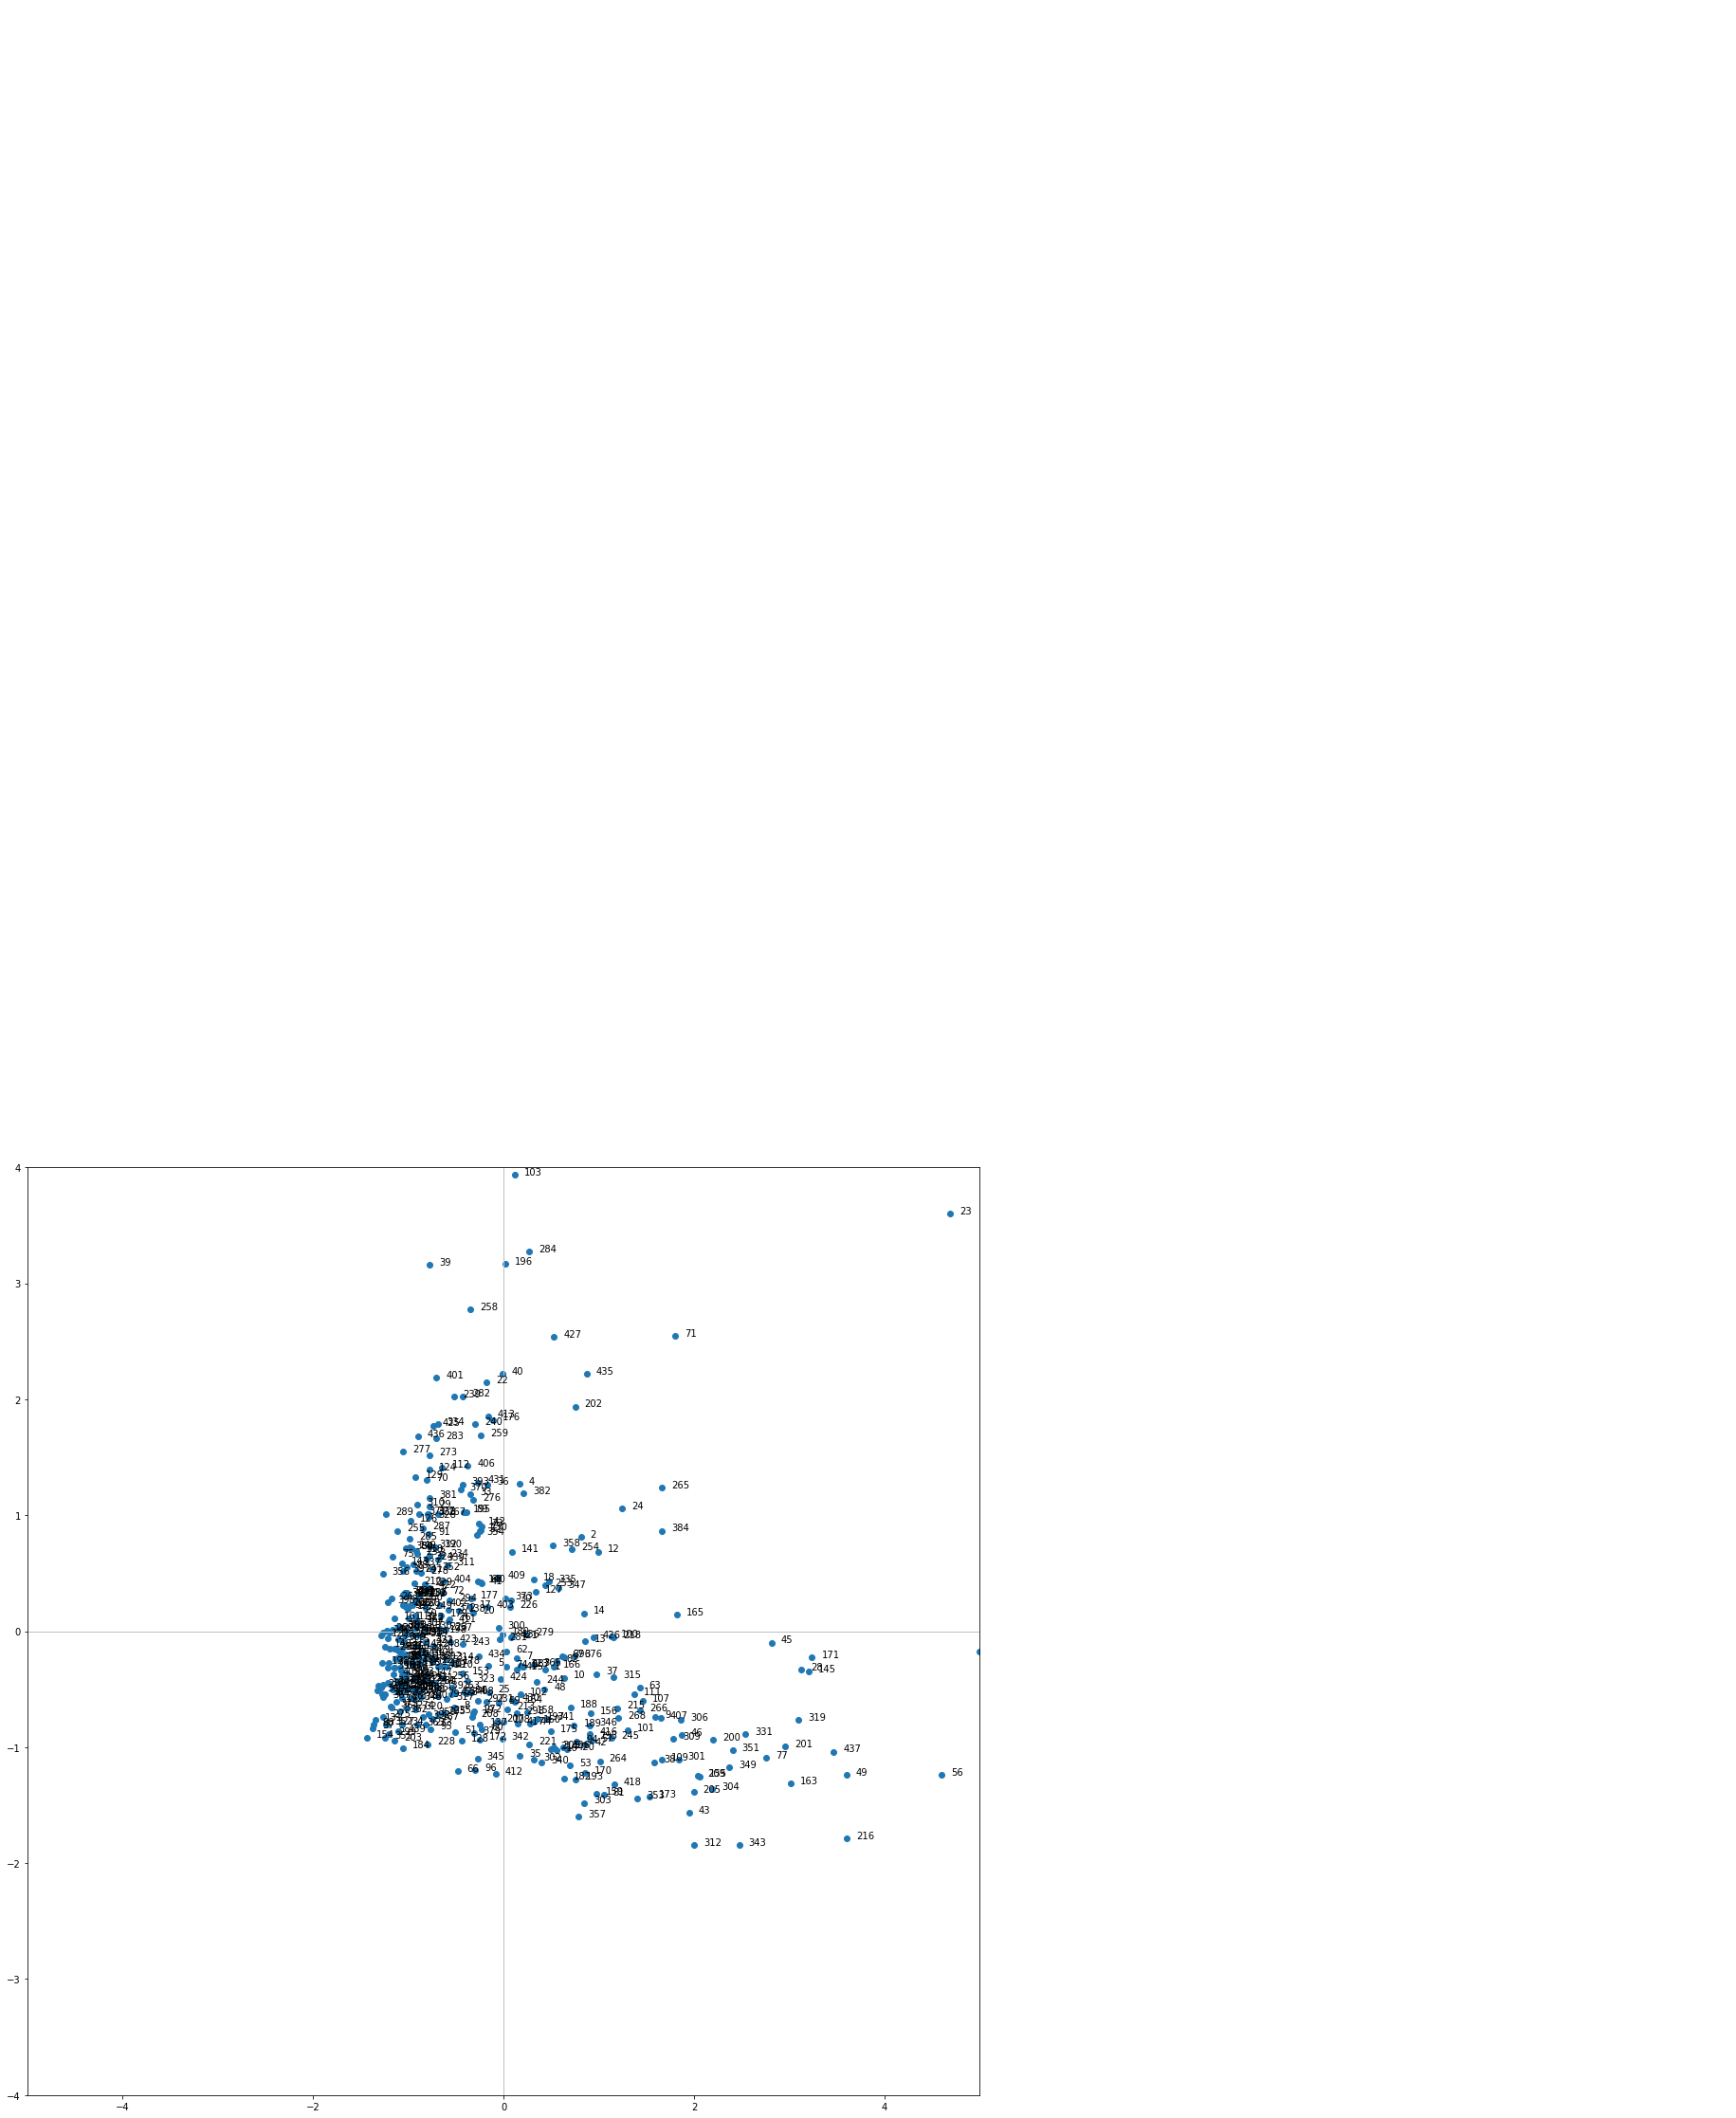

In [25]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(18,18))
axes.set_xlim(-5,5)
axes.set_ylim(-4,4) 

# placement des points
plt.scatter(principalComponents[:,0],principalComponents[:,1])

#placement des étiquettes des observations
for i in range(440):
     plt.annotate(data.index[i],(principalComponents[i,0]+0.1,principalComponents[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

On remarque qu'il y a plus d'individus au niveau du centre de gravité.
Cependant certains individus  comme le 23 par exemple présente des caractéritiques rares.

In [31]:
# Calcul des contributions
# contribution des individus dans l'inertie totale
di = np.sum(data_cr**2,axis=1)
print(pd.DataFrame({'ID':data.index,'d_i':di}))

      ID        d_i
0      0   0.632268
1      1   0.566947
2      2   5.436559
3      3   1.283337
4      4   2.487360
..   ...        ...
435  435   8.093296
436  436   6.084971
437  437  13.899635
438  438   1.195152
439  439   2.082350

[440 rows x 2 columns]


**CLASSIFICATION CAH**

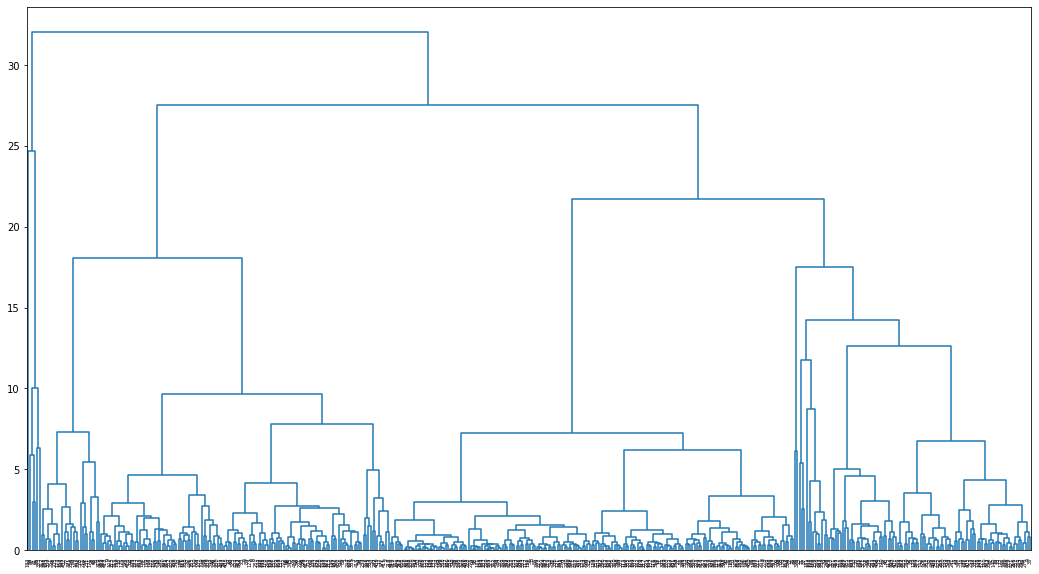

In [46]:
#librairies pour la CAH

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

Z = linkage(data_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.figure(figsize=(18,10))
dendrogram(Z,labels=data.index,color_threshold=0)
plt.show()

In [ ]:
On pourrait retenir retenir quatre classes. Cela pourrait etre optimale ( lorsquon trace à partir de la hauteur 18 ou 19).
Les classes sont bien matérialisées. Individus les plus proches se retrouvent dans un meme groupe

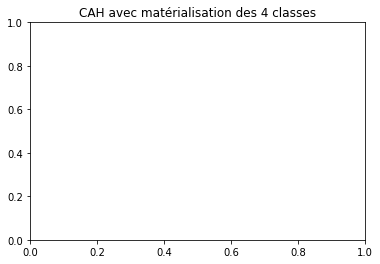

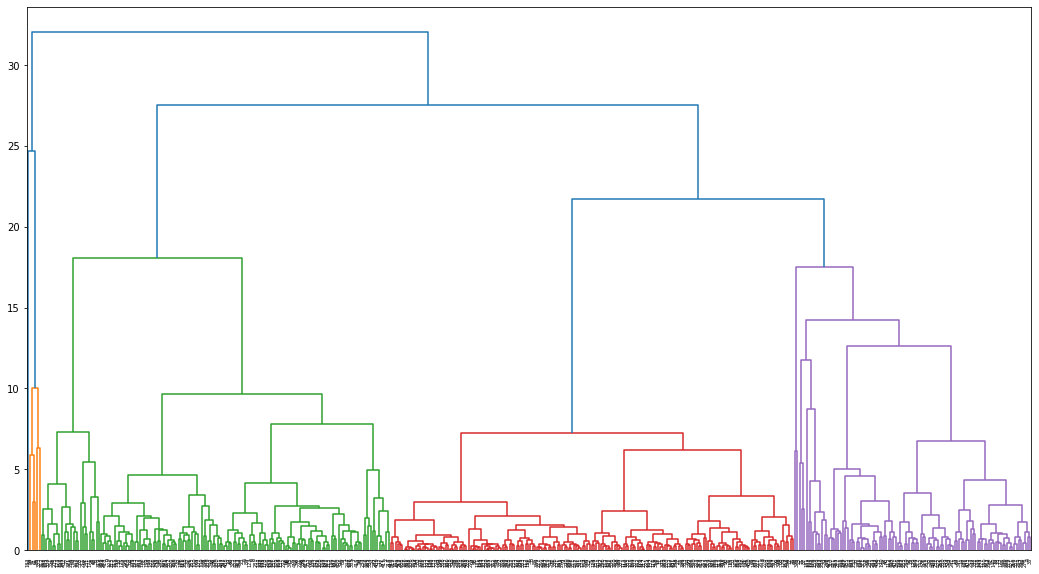

In [54]:
#matérialisation des 4 classes (hauteur t = 19)

plt.title('CAH avec matérialisation des 4 classes')
plt.figure(figsize=(18,10))
dendrogram(Z,labels=data.index,color_threshold=19)
plt.show()

In [60]:
groupes_cah = fcluster(Z,t=19,criterion='distance')
print(groupes_cah)

[3 3 3 4 5 3 3 3 4 3 3 4 5 5 5 4 3 3 5 3 5 4 5 5 3 3 4 4 3 5 5 4 5 5 4 3 5
 3 3 5 5 5 3 3 3 3 3 1 3 3 4 4 5 3 5 4 3 3 4 3 3 1 3 3 4 3 3 5 4 4 5 5 4 5
 3 4 4 3 4 4 4 3 3 4 3 1 1 5 4 5 4 5 3 5 3 4 3 4 4 4 3 3 3 5 4 4 3 3 3 3 4
 3 5 4 4 4 4 4 4 4 4 4 4 3 5 5 5 5 3 5 4 4 4 4 4 4 3 3 5 4 5 5 5 4 3 3 4 4
 4 5 4 4 4 3 4 3 3 4 3 3 3 4 4 3 3 3 3 4 4 4 3 3 3 3 4 3 5 5 3 4 5 5 3 2 4
 3 4 3 3 3 5 4 4 3 4 5 5 3 4 4 3 3 3 4 4 3 4 3 3 3 5 3 4 3 3 3 3 4 3 4 4 3
 4 4 4 4 5 4 4 4 5 3 5 4 5 4 4 4 4 5 5 5 4 5 3 3 4 4 3 4 4 3 4 5 3 5 3 4 5
 5 4 4 5 4 3 3 3 5 3 4 4 4 3 5 4 4 5 5 4 5 4 3 5 5 5 5 4 5 4 5 4 4 4 3 5 4
 4 3 3 4 5 3 3 3 3 3 3 4 4 3 5 5 3 4 4 3 4 4 4 3 4 4 4 3 5 5 4 4 5 4 4 3 5
 1 5 5 4 4 5 4 3 3 3 3 4 3 3 5 4 3 4 3 4 3 5 4 4 3 3 4 4 4 4 4 4 3 4 4 4 4
 5 5 3 5 4 4 3 5 4 3 5 5 5 4 3 4 4 4 4 4 4 4 4 5 4 4 3 4 4 4 4 5 5 5 4 4 5
 3 3 3 4 3 3 5 4 3 3 3 3 4 3 5 5 3 3 5 3 5 4 4 3 5 5 4 3 5 5 3 4 4]


**CLASSIFICATION K-Means

In [55]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=4)  # on choisit 4 clusters avec l'étude précedente CAH
kmeans.fit(data_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_) 

[3 3 3 3 0 3 3 3 3 1 3 3 0 3 3 3 3 3 3 3 3 3 0 1 0 3 3 3 1 0 3 3 3 0 3 3 0
 3 1 0 0 3 3 1 3 1 1 1 3 1 3 3 0 3 0 3 1 3 3 3 3 1 3 3 3 1 3 3 3 3 0 0 3 0
 3 3 3 1 3 3 3 3 3 3 3 1 1 0 3 0 3 3 1 0 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 1 3
 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 1 3 3
 3 0 3 3 3 3 3 1 3 3 3 3 3 3 3 1 3 1 3 3 3 3 3 1 3 1 3 3 0 3 3 3 3 0 3 2 3
 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 1 1 0 3 3 1 3 3 3 1 3 1 3 3 3 3 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 3 3 3 1 3 0 3 0 3 3 0
 0 3 3 3 3 3 3 3 0 3 3 3 3 3 0 3 3 0 0 3 3 3 3 0 0 0 0 3 0 3 0 3 3 3 3 3 3
 3 3 3 3 3 1 3 3 1 3 1 3 3 1 3 0 1 3 3 3 3 3 3 1 3 3 3 3 0 0 3 3 0 3 3 1 3
 1 0 0 3 3 3 3 3 3 3 1 3 3 3 0 3 1 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 0 0 3 3 3 3 3 0 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3 0 3 3 3 3 0
 1 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 0 3 0 3 3 3 0 3 3 3 0 0 1 3 3]


In [56]:
# Affichage
print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))

      0
0   125
0   335
0   334
0   149
0   328
..  ...
3   168
3   167
3   166
3   178
3   439

[440 rows x 1 columns]


In [61]:
# Comparaison 
#correspondance avec les groupes de la CAH
# en row cah et cal k-means
pd.crosstab(groupes_cah,kmeans.labels_)

col_0   0   1  2    3
row_0                
1       0   5  0    0
2       0   0  1    0
3       2  37  0  114
4       0   0  0  177
5      67   1  0   36